#### Causal inference in multivariate time series

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import random
import pathlib
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from scms import StructuralCausalModels
from renyiDAG import generate_dag_and_time_series
# from TSGen import RandomCausalSimulator
from src.TSGen import CausalSimulator

np.random.seed(1)

Adjacency Matrix:
[[0 1 0 1 0 0 1]
 [0 0 1 1 1 1 1]
 [0 0 0 1 0 1 1]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]]

Sample Data:
         Z0        Z1        Z2        Z3        Z4        Z5        Z6
0  0.311411  0.271165  0.204750  0.257518  0.248005  0.275032  0.308460
1  0.379422  0.273199  0.201197  0.375206  0.247127  0.275074  0.405764
2  0.342948  0.267876  0.204173  0.337252  0.248071  0.275094  0.398988
3  0.527533  0.270441  0.204854  0.357009  0.282838  0.388554  0.463629
4  0.592860  0.366604  0.289399  0.381932  0.712882  0.381332  1.000000


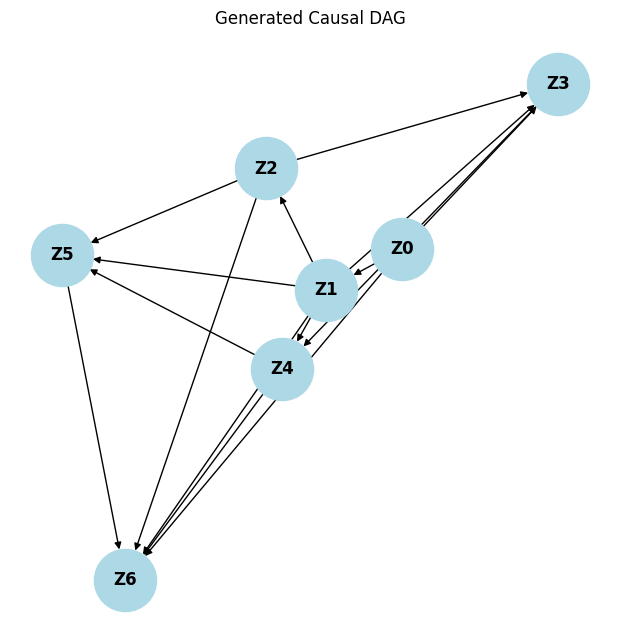

In [74]:
n_nodes = 7     # Total variables (10 variables)
edge_prob = 0.66      # Probability of edge creation
nonlinear_prob = 0.7   # Chance of nonlinearity per edge              

sim = RandomCausalSimulator(n_nodes, edge_prob, nonlinear_prob, 0.0, seed=42)
df, graph = sim.simulate()  # Only df and adj returned

print("Adjacency Matrix:")
print(graph)
print("\nSample Data:")
print(df.head())

sim.draw_dag()


<Axes: >

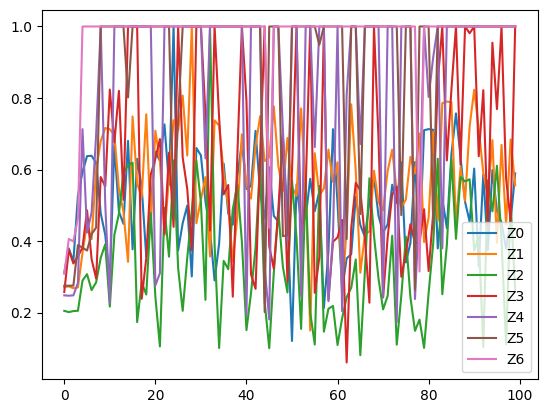

In [75]:
df.iloc[:100, ].plot()

In [27]:
df.iloc[:50, ].corr()

,Z0,Z1,Z2,Z3,Z4,Z5
Z0,1.000000,0.160862,-0.176395,0.011771,0.001667,-0.107173
Z1,0.160862,1.000000,0.000592,0.201214,0.536903,0.152965
Z2,-0.176395,0.000592,1.000000,0.382532,0.335864,0.276298
Z3,0.011771,0.201214,0.382532,1.000000,0.449008,0.612374
Z4,0.001667,0.536903,0.335864,0.449008,1.000000,0.641400
Z5,-0.107173,0.152965,0.276298,0.612374,0.641400,1.000000


In [ ]:
# Example Configuration:
n_nodes = 3          # Total variables (10 variables)
edge_prob = .30      # Probability of edge creation
nonlinear_prob = 0.0   # Chance of nonlinearity per edge
timesteps = 200        # Number of time steps
lag = 5                # Lag for causal effects

# Generate Data
df, causal_matrix = generate_dag_and_time_series(n_nodes, edge_prob, nonlinear_prob,
                                                     timesteps)

print("Generated Causal Matrix:")
print(causal_matrix)
print("\nGenerated Time Series Data (first few rows):")
print(df.head())

In [ ]:
df.iloc[:50, :].plot()

In [ ]:
df.corr()

In [ ]:
# Modify the code for complete experiments
plot_path = r"../plots/"
edge_densities = np.arange(0.2, 0.3, 0.1)
etests = len(edge_densities)
group_sizes = np.arange(3, 8, 2)
# group_sizes = np.array([6])
gtests = len(group_sizes)
res_all = []

for g in range(etests):

    edge_density = edge_densities[g]
    res = np.zeros((3, 3))

    for t in range(gtests):

        nodes = group_sizes[t]
        params = {'g_one_start': 0,
                  'g_one_end': int(nodes/2),
                  'g_two_start': int(nodes/2),
                  'g_two_end': nodes
                 }

        dag = StructuralCausalModels(nodes, edge_density)
        df = dag.df



In [ ]:
df

In [ ]:
dag.binary_matrix

In [ ]:
dag.draw_DAG()

In [ ]:
df.corr()